# 0. Run the backtest code

In [ ]:
# Rb 5min test
!python ../Main.py -o ../Results/Ag_15min_PriceThreshold2 -c ../Config/Ag_15min_PriceThreshold2.json > /dev/null


/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
# sys.path.append('/home/runmin/Documents/Qishi/QishiQR/BacktestEngine/Engine')
sys.path.append('/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng/BacktestEngine/')
sys.path.append('/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng/BacktestEngine/Engine')

import matplotlib.pyplot as plt
from PostProcessing import GetResult
from PostProcessing import OffSetAverage

def PlotResult(TesterResults):
    for ID, tester in enumerate(TesterResults):
        print("Tester=",ID)
        
        params = tester["globalPara"]
        for key, item in tester["localPara"].items():
            print("{} = {}".format(key, item))

        fig, ax = plt.subplots(1,2,figsize=(20,6))
        tester["insample"].ensemble.ensembles[0].result.benchmark.plot(ax=ax[0])
        tester["insample"].plot(ax=ax[0])
        tester["outsample"].ensemble.ensembles[0].result.benchmark.plot(ax=ax[1])
        tester["outsample"].plot(ax=ax[1])
        
        ax[0].set_xlabel("Date")
        ax[0].set_title("Equity curve - Insample")
        ax[1].set_xlabel("Datae")
        ax[1].set_title("Equity curve - Outsample")
        plt.show()

    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Ag - 15min 

In [18]:
Ag_15min_result = GetResult("../Results/Ag_15min_PriceThreshold2/")


Tester= 0 |file_path =  ../Results/Ag_15min_PriceThreshold2/Result_0.pkl

Tester= 1 |file_path =  ../Results/Ag_15min_PriceThreshold2/Result_1.pkl

Tester= 2 |file_path =  ../Results/Ag_15min_PriceThreshold2/Result_2.pkl

Tester= 3 |file_path =  ../Results/Ag_15min_PriceThreshold2/Result_3.pkl

Tester= 4 |file_path =  ../Results/Ag_15min_PriceThreshold2/Result_4.pkl

Tester= 5 |file_path =  ../Results/Ag_15min_PriceThreshold2/Result_5.pkl

Tester= 6 |file_path =  ../Results/Ag_15min_PriceThreshold2/Result_6.pkl

Tester= 7 |file_path =  ../Results/Ag_15min_PriceThreshold2/Result_7.pkl

Tester= 8 |file_path =  ../Results/Ag_15min_PriceThreshold2/Result_8.pkl

Tester= 9 |file_path =  ../Results/Ag_15min_PriceThreshold2/Result_9.pkl

Tester= 10 |file_path =  ../Results/Ag_15min_PriceThreshold2/Result_10.pkl

Tester= 11 |file_path =  ../Results/Ag_15min_PriceThreshold2/Result_11.pkl

Tester= 12 |file_path =  ../Results/Ag_15min_PriceThreshold2/Result_12.pkl

Tester= 13 |file_path =  ../Res

## 1.0 Ag - 15min offset average - group test results by price threshold

In [3]:
# len(Rb_5min_result)
# print(Rb_5min_result[0]['localPara'])
# Rb_5min_result[0]

In [19]:
NoCost_Result_Group = {10e-4:[],5e-4:[],0:[],1:[],2:[]}
FixedCost_Result_Group = {10e-4:[],5e-4:[],0:[],1:[],2:[]}

for result in Ag_15min_result:
    price_threshold = result['localPara']['price_threshold']
    if result['localPara']['fixed_cost']:
        FixedCost_Result_Group[price_threshold].append(result)
    else:
        NoCost_Result_Group[price_threshold].append(result)
    

---
# 1 NO trading cost

## 1.1 Ag --- 15min offset average --- price threshold = 1

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

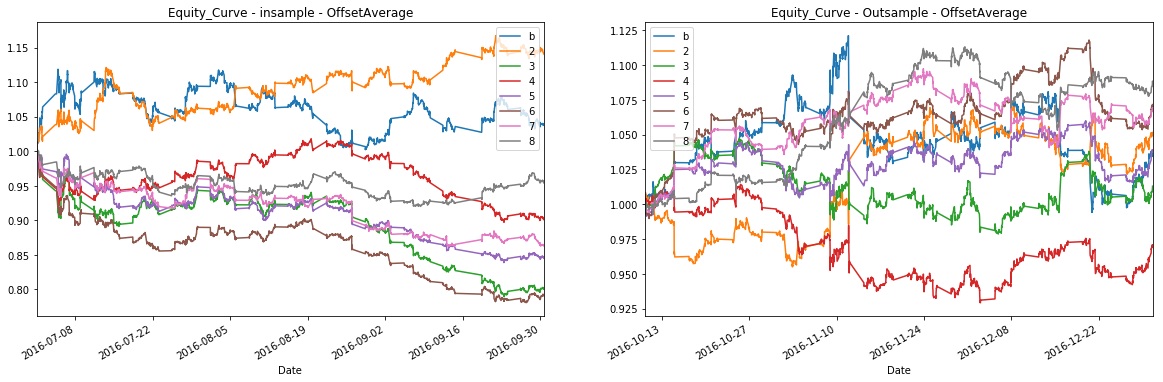

In [20]:
Ag_15min_Offset_Average_1d = OffSetAverage(NoCost_Result_Group[1])

Benchmark = Ag_15min_Offset_Average_1d.GetBenchmark()
AveEqCurve = Ag_15min_Offset_Average_1d.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [21]:
Ag_15min_Offset_Average_1d.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.205144,0.001812,-0.001620,0.002651,0.000124,-0.028688,0.042206,-0.087076,1.641478,2.207519,1109.4,1.139622,0.394898
1,0.245098,-0.002840,-0.002245,0.001914,-0.000192,-0.053452,0.025953,-0.219487,0.863483,-2.888771,1120.2,0.802527,0.475032
2,0.230158,-0.001300,-0.002078,0.002148,-0.000088,-0.046170,0.026677,-0.158741,1.035691,-1.406929,1116.4,0.901254,0.455908
3,0.221132,-0.002139,-0.002038,0.002012,-0.000136,-0.042667,0.031756,-0.193074,0.988532,-2.390556,1204.4,0.844470,0.451617
4,0.223105,-0.003016,-0.002145,0.001945,-0.000200,-0.043061,0.023674,-0.227541,0.911793,-3.465072,1182.8,0.791233,0.453501
5,0.218091,-0.001883,-0.002138,0.002077,-0.000127,-0.034334,0.024072,-0.181530,0.974483,-2.096522,1142.6,0.862272,0.453778
6,0.206630,-0.000574,-0.002103,0.002064,-0.000035,-0.031861,0.022922,-0.135957,0.984290,-0.653179,1147.4,0.952936,0.473858


In [22]:
Ag_15min_Offset_Average_1d.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.174336,0.000730,-0.001364,0.002046,0.000051,-0.026704,0.039753,-0.069568,1.509838,1.145374,1018.2,1.053558,0.399102
1,0.164908,0.000218,-0.001747,0.001638,0.000015,-0.036251,0.031308,-0.086110,0.941281,0.291137,1033.0,1.011637,0.497558
2,0.153880,-0.000397,-0.001701,0.001660,-0.000028,-0.030962,0.021967,-0.107774,0.978079,-0.673678,1029.4,0.969608,0.477742
3,0.158858,0.000561,-0.001577,0.001710,0.000034,-0.026379,0.025842,-0.069622,1.086516,0.888376,1113.8,1.037398,0.468319
4,0.167531,0.001003,-0.001631,0.001653,0.000056,-0.027091,0.026284,-0.092755,1.028647,1.499954,1110.6,1.073466,0.489590
5,0.174804,0.000960,-0.001632,0.001719,0.000070,-0.021976,0.028234,-0.094607,1.054035,1.290685,1050.8,1.069273,0.486253
6,0.163879,0.001213,-0.001619,0.001743,0.000082,-0.021459,0.025418,-0.084539,1.078483,1.844082,1076.0,1.087279,0.483693


## 1.2  Ag --- 15min offset average --- price threshold = 2
# Best In-Sample (order =2)

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

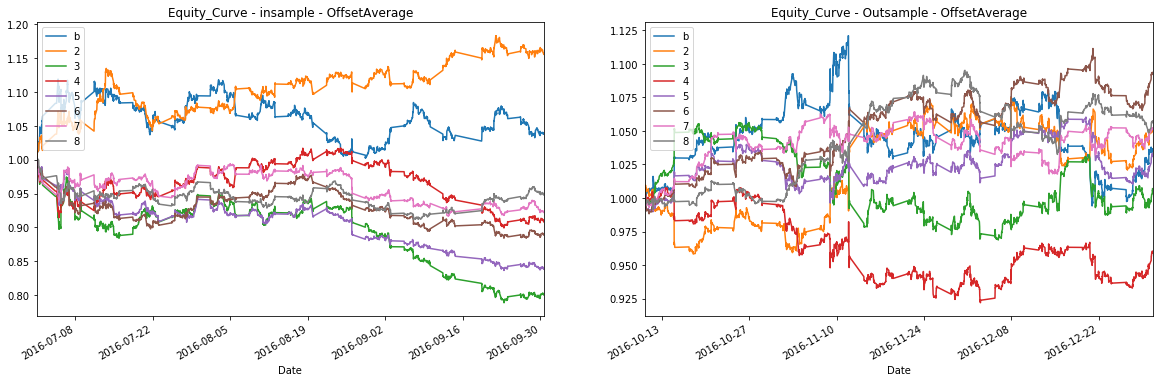

In [23]:
Ag_15min_Offset_Average_2d = OffSetAverage(NoCost_Result_Group[2])

Benchmark = Ag_15min_Offset_Average_2d.GetBenchmark()
AveEqCurve = Ag_15min_Offset_Average_2d.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [24]:
Ag_15min_Offset_Average_2d.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.204640,0.001980,-0.001619,0.002664,0.000137,-0.026887,0.045779,-0.087482,1.650117,2.415203,1103.2,1.154425,0.396220
1,0.249169,-0.002823,-0.002327,0.001862,-0.000192,-0.055038,0.025918,-0.218934,0.800573,-2.814343,1119.8,0.802211,0.490979
2,0.231927,-0.001183,-0.002049,0.002163,-0.000080,-0.052713,0.023983,-0.143045,1.058045,-1.279978,1124.0,0.908707,0.452428
3,0.230528,-0.002256,-0.002059,0.002014,-0.000145,-0.042089,0.030080,-0.197911,0.980464,-2.437864,1181.0,0.837171,0.451533
4,0.221016,-0.001502,-0.002061,0.002061,-0.000093,-0.041886,0.024252,-0.167445,0.999254,-1.802037,1182.4,0.890006,0.458274
5,0.222179,-0.001025,-0.002119,0.002115,-0.000068,-0.029195,0.025810,-0.154049,0.999471,-1.161684,1128.2,0.919286,0.464792
6,0.215426,-0.000673,-0.002143,0.002119,-0.000047,-0.033928,0.023140,-0.139000,0.991521,-0.753420,1115.6,0.943670,0.471415


In [25]:
Ag_15min_Offset_Average_2d.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.172768,0.000733,-0.001372,0.002052,0.000051,-0.026704,0.039753,-0.069265,1.503351,1.155750,1015.2,1.053506,0.400282
1,0.160355,0.000147,-0.001778,0.001603,0.000011,-0.039540,0.026760,-0.096678,0.901853,0.178027,1037.0,1.007042,0.507143
2,0.159178,-0.000548,-0.001693,0.001657,-0.000038,-0.029846,0.021503,-0.109725,0.981880,-0.916500,1039.6,0.958797,0.474646
3,0.163230,0.000474,-0.001583,0.001724,0.000029,-0.026351,0.025793,-0.082923,1.093311,0.684209,1091.2,1.032029,0.466074
4,0.170528,0.001268,-0.001533,0.001732,0.000078,-0.020975,0.026884,-0.071911,1.134193,1.874188,1128.4,1.091471,0.471671
5,0.166414,0.000733,-0.001631,0.001672,0.000052,-0.021492,0.029589,-0.095402,1.027333,1.047760,1057.8,1.051580,0.489496
6,0.165112,0.000802,-0.001624,0.001758,0.000053,-0.021020,0.025418,-0.079451,1.083053,1.175232,1063.6,1.055763,0.475259


## 1.3  Ag --- 15min offset average --- price threshold = 0bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

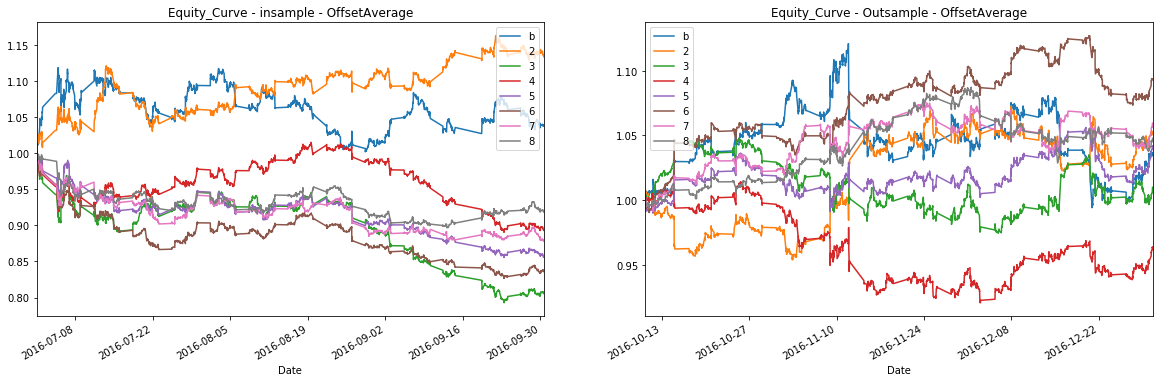

In [12]:
Ag_15min_Offset_Average_0bps = OffSetAverage(NoCost_Result_Group[0])

Benchmark = Ag_15min_Offset_Average_0bps.GetBenchmark()
AveEqCurve = Ag_15min_Offset_Average_0bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [13]:
Ag_15min_Offset_Average_0bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.201852,0.001736,-0.001628,0.002666,0.000119,-0.026887,0.054021,-0.088319,1.641028,2.148080,1111.8,1.132809,0.393705
1,0.247154,-0.002756,-0.002255,0.001924,-0.000188,-0.055038,0.025953,-0.216065,0.862951,-2.774949,1113.8,0.806976,0.476777
2,0.228466,-0.001412,-0.002085,0.002139,-0.000097,-0.050359,0.024670,-0.158909,1.028429,-1.551180,1111.6,0.893087,0.456267
3,0.227323,-0.001975,-0.002038,0.002022,-0.000128,-0.044806,0.032069,-0.173727,0.993852,-2.182911,1179.6,0.854712,0.452729
4,0.216384,-0.002289,-0.002055,0.001982,-0.000152,-0.042259,0.025813,-0.186107,0.968733,-2.726112,1201.6,0.838359,0.449874
5,0.228950,-0.001664,-0.002091,0.002052,-0.000114,-0.035877,0.026665,-0.184458,0.983085,-1.798878,1158.0,0.877658,0.455126
6,0.212028,-0.001075,-0.002062,0.002032,-0.000069,-0.035784,0.021044,-0.144625,0.987587,-1.237452,1187.4,0.915319,0.465797


In [14]:
Ag_15min_Offset_Average_0bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.174245,0.000751,-0.001360,0.002048,0.000052,-0.026704,0.039753,-0.067781,1.514846,1.146222,1017.4,1.054830,0.399042
1,0.165662,0.000177,-0.001761,0.001652,0.000012,-0.036251,0.031308,-0.089508,0.942918,0.241938,1018.2,1.008543,0.497201
2,0.154528,-0.000492,-0.001723,0.001667,-0.000035,-0.030962,0.021967,-0.112631,0.969212,-0.836593,1015.4,0.963265,0.478595
3,0.154827,0.000600,-0.001583,0.001714,0.000040,-0.028312,0.025842,-0.080375,1.085259,0.939934,1075.8,1.039839,0.472056
4,0.167808,0.001285,-0.001544,0.001714,0.000083,-0.023551,0.027137,-0.080477,1.112798,1.878245,1123.4,1.092839,0.476302
5,0.179952,0.000837,-0.001603,0.001635,0.000055,-0.023797,0.025972,-0.085594,1.023706,1.230153,1093.0,1.058335,0.490239
6,0.159562,0.000677,-0.001663,0.001698,0.000046,-0.023950,0.026476,-0.078647,1.021344,1.063974,1109.8,1.046942,0.487319


## 2 Fixed Trading Cost

## 2.1 Ag --- 15min offset average --- price threshold = 1

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

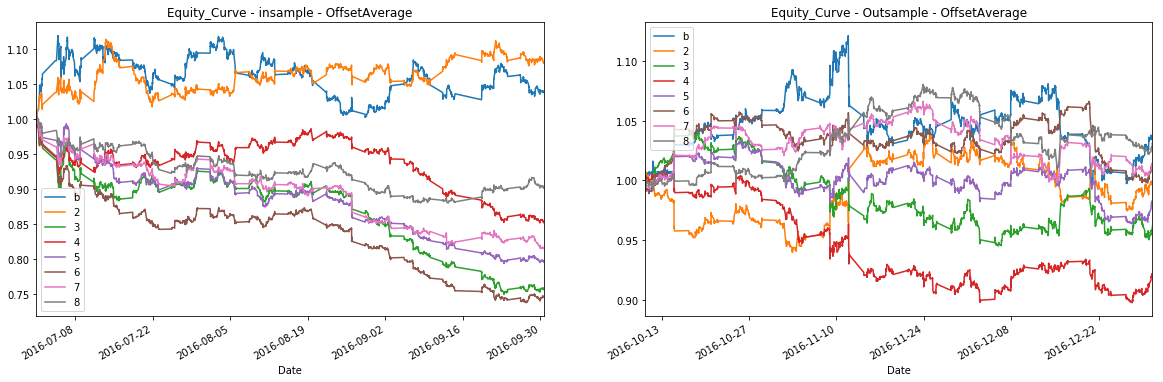

In [26]:
Ag_15min_Offset_Average_1d = OffSetAverage(FixedCost_Result_Group[1])

Benchmark = Ag_15min_Offset_Average_1d.GetBenchmark()
AveEqCurve = Ag_15min_Offset_Average_1d.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [27]:
Ag_15min_Offset_Average_1d.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.206278,0.001082,-0.001540,0.002699,0.000074,-0.028738,0.042156,-0.094003,1.759345,1.309917,1109.4,1.078129,0.381008
1,0.244629,-0.003577,-0.002096,0.001916,-0.000242,-0.053502,0.025903,-0.254906,0.925165,-3.650320,1120.2,0.758833,0.462180
2,0.229718,-0.002034,-0.001964,0.002163,-0.000138,-0.046220,0.026627,-0.181930,1.102247,-2.212065,1116.4,0.852325,0.442473
3,0.221313,-0.002931,-0.001919,0.002013,-0.000186,-0.042717,0.031706,-0.235723,1.050614,-3.289932,1204.4,0.795067,0.440628
4,0.223078,-0.003794,-0.001993,0.001941,-0.000250,-0.043111,0.023624,-0.269544,0.977774,-4.336962,1182.8,0.745671,0.443046
5,0.217921,-0.002635,-0.001972,0.002079,-0.000177,-0.034384,0.024022,-0.219849,1.056766,-2.968139,1142.6,0.814368,0.442799
6,0.206482,-0.001329,-0.001939,0.002063,-0.000085,-0.031911,0.022872,-0.158807,1.066249,-1.577835,1147.4,0.900024,0.462706


In [28]:
Ag_15min_Offset_Average_1d.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.175168,0.000013,-0.001296,0.002066,7.192005e-07,-0.026754,0.039703,-0.088793,1.604213,0.114616,1018.2,1.001253,0.385745
1,0.164846,-0.000510,-0.001608,0.001624,-3.476017e-05,-0.036301,0.031258,-0.104668,1.013785,-0.825575,1033.0,0.960726,0.486511
2,0.153677,-0.001122,-0.001582,0.001658,-7.783691e-05,-0.031012,0.021917,-0.134499,1.050494,-1.857240,1029.4,0.920944,0.464288
3,0.159263,-0.000223,-0.001461,0.001706,-1.640958e-05,-0.026429,0.025792,-0.087894,1.170558,-0.357681,1113.8,0.981072,0.456097
4,0.167727,0.000221,-0.001495,0.001641,5.934894e-06,-0.027141,0.026234,-0.109584,1.110296,0.327638,1110.6,1.014954,0.478651
5,0.175104,0.000220,-0.001510,0.001712,1.969137e-05,-0.022026,0.028184,-0.110420,1.134511,0.203190,1050.8,1.014767,0.474398
6,0.163896,0.000455,-0.001498,0.001731,3.204396e-05,-0.021509,0.025368,-0.095910,1.156178,0.679782,1076.0,1.030421,0.473608


## 2.2  Ag --- 15min offset average --- price threshold = 2
# Best In-sample with cost

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

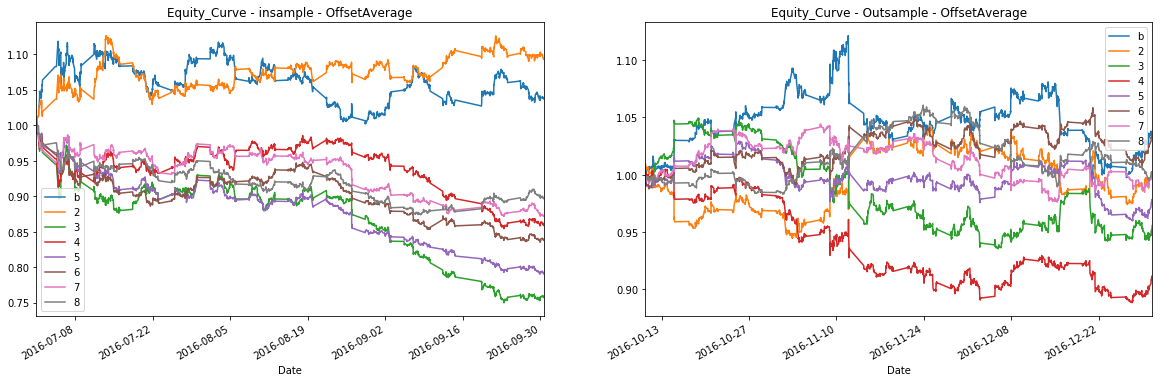

In [29]:
Ag_15min_Offset_Average_2d = OffSetAverage(FixedCost_Result_Group[2])

Benchmark = Ag_15min_Offset_Average_2d.GetBenchmark()
AveEqCurve = Ag_15min_Offset_Average_2d.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [30]:
Ag_15min_Offset_Average_2d.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.205867,0.001254,-0.001536,0.002716,0.000087,-0.026937,0.045729,-0.095083,1.774848,1.518941,1103.2,1.092477,0.381698
1,0.248630,-0.003559,-0.002165,0.001866,-0.000242,-0.055088,0.025868,-0.253347,0.862114,-3.562734,1119.8,0.758526,0.477229
2,0.231399,-0.001923,-0.001936,0.002182,-0.000130,-0.052763,0.023933,-0.169774,1.128603,-2.086037,1124.0,0.859036,0.438542
3,0.230588,-0.003033,-0.001936,0.002009,-0.000195,-0.042139,0.030030,-0.238436,1.039648,-3.282555,1181.0,0.789218,0.441500
4,0.221125,-0.002280,-0.001923,0.002067,-0.000143,-0.041936,0.024202,-0.198004,1.072967,-2.690723,1182.4,0.839151,0.446356
5,0.221977,-0.001767,-0.001978,0.002114,-0.000118,-0.029245,0.025760,-0.184110,1.070120,-2.002094,1128.2,0.868970,0.454243
6,0.215527,-0.001407,-0.001992,0.002117,-0.000097,-0.033978,0.023090,-0.167538,1.066086,-1.626901,1115.6,0.892440,0.460855


In [31]:
Ag_15min_Offset_Average_2d.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.173613,0.000018,-0.001305,0.002075,0.000001,-0.026754,0.039703,-0.089481,1.597913,0.117689,1015.2,1.001354,0.386493
1,0.160316,-0.000583,-0.001641,0.001590,-0.000039,-0.039590,0.026710,-0.115340,0.968327,-0.976664,1037.0,0.956184,0.495754
2,0.158931,-0.001280,-0.001579,0.001660,-0.000088,-0.029896,0.021453,-0.139438,1.053479,-2.073815,1039.6,0.910197,0.460341
3,0.163496,-0.000295,-0.001470,0.001717,-0.000021,-0.026401,0.025743,-0.104968,1.172104,-0.490318,1091.2,0.977126,0.454854
4,0.170701,0.000473,-0.001418,0.001726,0.000028,-0.021025,0.026834,-0.087314,1.221073,0.706507,1128.4,1.031427,0.459956
5,0.166801,-0.000012,-0.001515,0.001667,0.000002,-0.021542,0.029539,-0.114684,1.102140,-0.094192,1057.8,0.997560,0.476736
6,0.165410,0.000053,-0.001506,0.001755,0.000003,-0.021070,0.025368,-0.090942,1.165909,0.038052,1063.6,1.001061,0.462888


## 2.3  Ag --- 15min offset average --- price threshold = 0

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

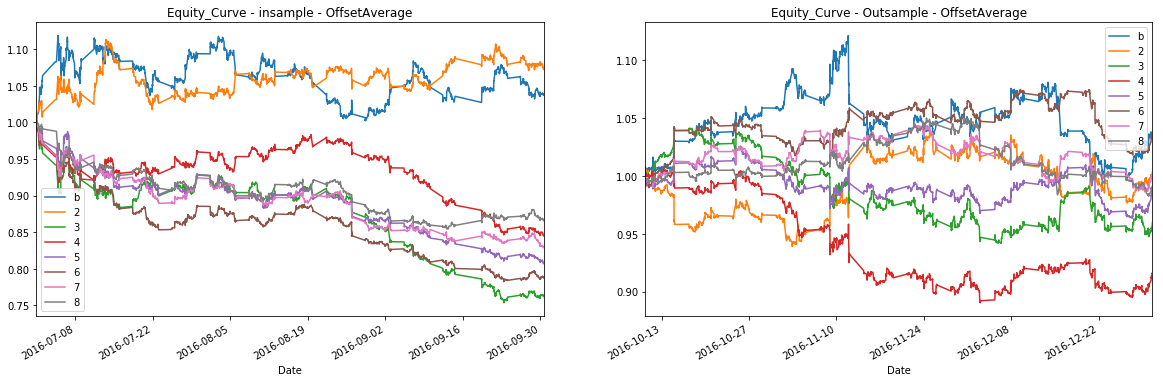

In [24]:
Ag_15min_Offset_Average_0bps = OffSetAverage(FixedCost_Result_Group[0e-4])

Benchmark = Ag_15min_Offset_Average_0bps.GetBenchmark()
AveEqCurve = Ag_15min_Offset_Average_0bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [25]:
Ag_15min_Offset_Average_0bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.202999,0.001004,-0.001550,0.002714,0.000069,-0.026937,0.053971,-0.095076,1.754950,1.235177,1111.8,1.071544,0.379844
1,0.246718,-0.003488,-0.002109,0.001927,-0.000238,-0.055088,0.025903,-0.250795,0.923316,-3.525698,1113.8,0.763280,0.463851
2,0.227934,-0.002144,-0.001973,0.002154,-0.000147,-0.050409,0.024620,-0.185432,1.093033,-2.363402,1111.6,0.844802,0.442781
3,0.227283,-0.002751,-0.001915,0.002026,-0.000178,-0.044856,0.032019,-0.215567,1.058893,-3.042563,1179.6,0.805733,0.440774
4,0.216344,-0.003080,-0.001911,0.001979,-0.000202,-0.042309,0.025763,-0.230416,1.038872,-3.649995,1201.6,0.789176,0.439675
5,0.228597,-0.002426,-0.001937,0.002049,-0.000164,-0.035927,0.026615,-0.217824,1.059663,-2.645997,1158.0,0.828029,0.444928
6,0.212121,-0.001856,-0.001920,0.002024,-0.000119,-0.035834,0.020994,-0.181972,1.056892,-2.160552,1187.4,0.862575,0.456352


In [26]:
Ag_15min_Offset_Average_0bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.175140,0.000035,-0.001295,0.002069,0.000002,-0.026754,0.039703,-0.085612,1.606935,0.116526,1017.4,1.002499,0.385669
1,0.165625,-0.000540,-0.001627,0.001638,-0.000038,-0.036301,0.031258,-0.109716,1.012216,-0.851944,1018.2,0.958492,0.486398
2,0.154320,-0.001208,-0.001604,0.001668,-0.000085,-0.031012,0.021917,-0.138226,1.041411,-2.001556,1015.4,0.915569,0.464590
3,0.155294,-0.000157,-0.001475,0.001709,-0.000010,-0.028362,0.025792,-0.096106,1.160850,-0.283278,1075.8,0.985406,0.460252
4,0.168034,0.000494,-0.001422,0.001708,0.000033,-0.023601,0.027087,-0.096631,1.203040,0.692946,1123.4,1.033221,0.464550
5,0.180088,0.000067,-0.001480,0.001627,0.000005,-0.023847,0.025922,-0.101578,1.102940,0.135547,1093.0,1.002075,0.477917
6,0.159512,-0.000105,-0.001544,0.001685,-0.000004,-0.024000,0.026426,-0.095099,1.091161,-0.177702,1109.8,0.990609,0.476972
